# Øving 4
## Oppgave 1
En bil masse masse $m=1500 \textrm{ kg}$ kjører på horisontalt underlag med fart $v_0=80 \textrm{ km/h}$ idet den bråbremser for en hindring. Bilen har blokkeringsfrie bremser slik at det hele tiden virker maksimal hvilkefriksjon mot dekkene. Hvilefriksjonstallet mellom dekk og underlag er $\mu_s=0,80$. 

a) Hvor lang strekning trenger bilen for å stoppe, målt fra punktet der nedbremsingen startet? 
b) Hvor stor fart ville bilen ha truffet hindringen med, dersom den hadde kjørt i 90 km/h?
c) Ved en annen anledning kjører bilen nedover en bakke med 15 % stigning. Hvor lang strekning trenger bilen for å stoppe i dette tilfellet?


## Oppgave 2

Kula i et flipperspill skytes ut fra en fjærbelastet avtrekker. Spilleren trekker i fjæra slik at den presses sammen en avstand $x=7,0 \textrm{ cm}$. Se figuren under.

<center><img src="figurer/pinball_fjær.png" alt="" style="width: 400px;"/></center>

Hvor stor må fjærkonstanten $k$ til fjæra være dersom kula akkurat skal nå toppen av flipperspillet, som ligger en avstand $s=78 \textrm{ cm}$ fra punktet der kula forlater fjæra (i punktet der fjæra er slapp).



## Oppgave 3
En vogn i en berg-og-dalbane starter i en viss høyde $h$ over det laveste punktet A i en sirkulær loop med radius $R$. To andre punkter i loopen er markerte: B er midtveis oppe, og C er det høyeste punktet. Se figuren under.

<center><img src="figurer/oppgave_sirkelbevegelse_vogn_loop.png" alt="" style="width: 400px;"/></center>

I denne oppgaven skal vi se bort fra friksjon og luftmotstand.

a) Fra hvilken høyde $h$ over punkt A må vogna slippes for at den skal kunne fullføre en hel loop uten å miste kontakten med underlaget?

b) Hva er normalkrafta på vogna i det høyeste punktet i loopen dersom den slippes fra en starthøyde $h=3R$?


## Oppgave 4
En Tesla Model S har følgende data:

Masse: $m=2250 \textrm{ kg}$
Drag-koeffisient: $C= 0.24$
Frontareal $A=2,33 \textrm{  m}^2$

Beregn arbeidet gjort av luftmotstanden på bilen dersom den kjører en strekning på $10 \textrm{ km}$ en konstant fart på

i) $v=80 \textrm{ km/h}$ \
ii) $v=100 \textrm{ km/h}$

Angi svaret i $\textrm{kWh}$.

b) Vi skal nå anta at bilen akselererer fra 0 opp til den konstante farten i a) i løpet av en tid $T$; den holder deretter konstant fart i et tidsrom $\Delta t$, og bremser så ned igjen til 0 i løpet av samme tid $T$. Farten $v(t)$ kan da modelleres slik: 

   $$ v(t)=   \left\{
\begin{array}{ll}
      \frac{v_{\text{max}}}{2} \left(\sin(\frac{2\pi t}{T}-\frac{\pi}{2}) +1 \right) & 0<t<T \\
      v_{\text{max}} & T<t<T+\Delta t \\
      \frac{v_{\text{max}}}{2} \left(-\sin(\frac{2\pi (t-(T+\Delta t))}{T}-\frac{\pi}{2}) +1 \right) & T+\Delta t<t<2T+\Delta t \\
\end{array} 
\right.  $$

Lag et plott av $v(t)$ dersom $T=10 \textrm{ s}$, $\Delta t=100 \textrm{ s}$ og hhv.

i) $v_{\text{max}}=80 \textrm{ km/h}$ \
ii) $v_{\text{max}}=100 \textrm{ km/h}$.

c) Beregn hvor langt bilen har beveget seg fra start til slutt for

i) $v_{\text{max}}=80 \textrm{ km/h}$ \
ii) $v_{\text{max}}=100 \textrm{ km/h}$.

d) Beregn arbeidet som luftmotstanden har gjort på bilen fra start til slutt når farten $v(t)$ er gitt ved formelen i b). Hint: Arbeidet $W$ gjort av luftmotstanden $f=\frac{1}{2} \rho A C_d v^2$ kan finnes fra definisjonen av effekt, $P=dW/dt$, og sammenhengen $P=fv$, slik at $W= \int_{t_1}^{t_2} P dt$.

Tilbakelagt strekning [m]:  10000.00000289161
Arbeid utførst av luftmotstanden [kWh]:  0.46782181071019185


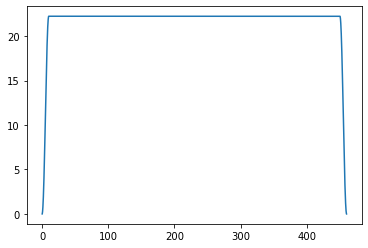

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def v(t,T,delta_t,vmax):
    """Funksjonen gir farten v(t) gitt ved den delte funksjonsforskriften angitt i oppgaveteksten.

    Input:
    t: tid [s]
    T: Akselerasjons- og nedbremsingstid [s]
    delta_t: Varighet av tidsrom med konstant fart vmax [s]
    vmax: Den maksimale farten bilen akselererer opp til [km/h]

    Output:
    v: fart v(t) [m/s]
    """

    
    if(t>0 and t<=T):
        v=0.5*(vmax/3.6)*(np.sin(np.pi*t/T-np.pi/2)+1)
       
    elif (t>T and t<=T+delta_t):
        v=vmax/3.6
       
    elif (t>T+delta_t and t<=2*T+delta_t):
        v=0.5*(vmax/3.6)*(-np.sin(np.pi*(t-(T+delta_t))/T-np.pi/2)+1)
       
    else:
        v=0
        
    return v

def P(t,A,C,T,delta_t,vmax):
    """Funksjonen """
    rho=1.23
    P=0.5*rho*A*C*v(t,T,delta_t,vmax)**3
    return P

#Konstanter
T=10
delta_t=440
vmax=80
t1=0
t2=2*T+delta_t
A=2.33
C=0.24

#Genererer tid- og fartsverdier og tegner opp v(t)
t_liste=np.arange(0.1,2*T+delta_t,0.1)
v_liste=[]
for t in t_liste:
    v_liste.append(v(t,T,delta_t,vmax))
plt.plot(t_liste,v_liste)

#Numerisk beregning av integraler.
s=integrate.quad(v,t1,t2,args=(T,delta_t,vmax)) #Tilbakelagt strekning; returnerer tuple (verdi, feilskranke)
W=integrate.quad(P,t1,t2,args=(A,C,T,delta_t,vmax)) #Utført arbeid av luftmotstanden; returnerer tuple(verdi, feilskranke)

print("Tilbakelagt strekning [m]: ", s[0])
print("Arbeid utførst av luftmotstanden [kWh]: ", W[0]/(3.6*10**6))